In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [41]:
data = pd.read_csv('availability.csv')
data

,ID,nom,coordinates,communes,capacity,availability_bike,unavailable_duration,unavailable_count,latitude,longitude,postcode
0,10001,René Boulanger - Lancry,"48.8685433, 2.3600032",Paris 10e Arrondissement,62,11.869707,0.0,0,48.868543,2.360003,75010
1,10003,Hauteville - Bonne Nouvelle,"48.87077436024, 2.3496496368327",Paris 10e Arrondissement,17,7.632075,119.0,2,48.870774,2.349650,75010
2,10004,Metz - Faubourg Saint-Denis,"48.870893, 2.353521",Paris 10e Arrondissement,48,17.184211,0.0,0,48.870893,2.353521,75010
3,10005,Petites Ecuries - Faubourg Poissonnière,"48.87397217237368, 2.348388757504776",Paris 10e Arrondissement,17,7.911932,0.0,0,48.873972,2.348389,75010
4,10006,Petites Ecuries - Faubourg Saint-Denis,"48.87287120589831, 2.3542150855064397",Paris 10e Arrondissement,28,13.638776,0.0,0,48.872871,2.354215,75010
...,...,...,...,...,...,...,...,...,...,...,...
1427,92004,Nanterre - Université,"48.901365, 2.212693",Nanterre,20,16.389831,0.0,0,48.901365,2.212693,92000
1428,92005,Gare de Nanterre Ville,"48.8950295, 2.1957932",Nanterre,43,21.022901,0.0,0,48.895029,2.195793,92000
1429,92006,Place Nelson Mandela,"48.897874318180556, 2.2182820737361912",Nanterre,30,5.030612,121.0,1,48.897874,2.218282,92000
1430,92007,Pesaro - Préfecture,"48.89577046284005, 2.223908342421055",Nanterre,22,6.164179,123.0,2,48.895770,2.223908,92000


# EDA

In [42]:
data.shape

(1432, 11)

In [43]:
data.nunique()

ID                      1432
nom                     1430
coordinates             1432
communes                  81
capacity                  61
availability_bike       1423
unavailable_duration     200
unavailable_count         12
latitude                1432
longitude               1430
postcode                  85
dtype: int64

In [44]:
data.isna().any()

ID                      False
nom                     False
coordinates             False
communes                False
capacity                False
availability_bike       False
unavailable_duration    False
unavailable_count       False
latitude                False
longitude               False
postcode                False
dtype: bool

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1432 non-null   int64  
 1   nom                   1432 non-null   object 
 2   coordinates           1432 non-null   object 
 3   communes              1432 non-null   object 
 4   capacity              1432 non-null   int64  
 5   availability_bike     1432 non-null   float64
 6   unavailable_duration  1432 non-null   float64
 7   unavailable_count     1432 non-null   int64  
 8   latitude              1432 non-null   float64
 9   longitude             1432 non-null   float64
 10  postcode              1432 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 123.2+ KB


In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1432.0,18599.208799,12160.851346,1001.000000,11025.750000,16109.000000,21953.250000,92008.000000
capacity,1432.0,31.525140,11.575206,11.000000,23.000000,30.000000,37.000000,74.000000
availability_bike,1432.0,12.474619,8.966498,0.000000,6.174597,10.350714,16.228485,74.805907
unavailable_duration,1432.0,96.476257,204.825503,0.000000,0.000000,0.000000,117.000000,2047.000000
unavailable_count,1432.0,1.006983,1.784303,0.000000,0.000000,0.000000,1.000000,11.000000
latitude,1432.0,48.858174,0.030696,48.764615,48.837592,48.858277,48.879337,48.951432
longitude,1432.0,2.340935,0.056778,2.165597,2.302564,2.343218,2.378635,2.538242
postcode,1432.0,80712.949721,8407.079125,75001.000000,75011.000000,75017.000000,92150.000000,95100.000000


# Cleaning Numerical Data

In [47]:
numerical = data.select_dtypes(include=np.number)
numerical = numerical.drop(['ID','postcode','latitude','longitude'],axis=1)

In [48]:
#for col in numerical.columns:
#    sns.displot(numerical[col], kde=True)
#    plt.show()

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


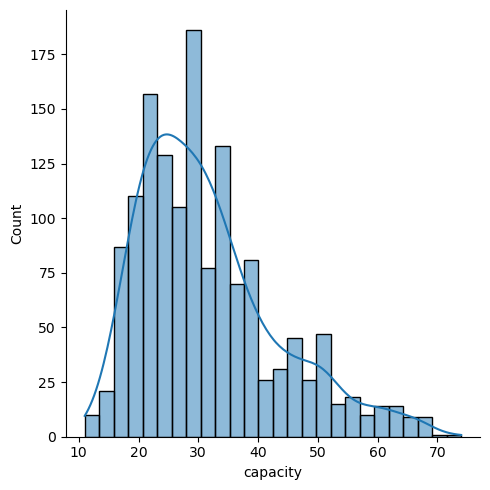

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


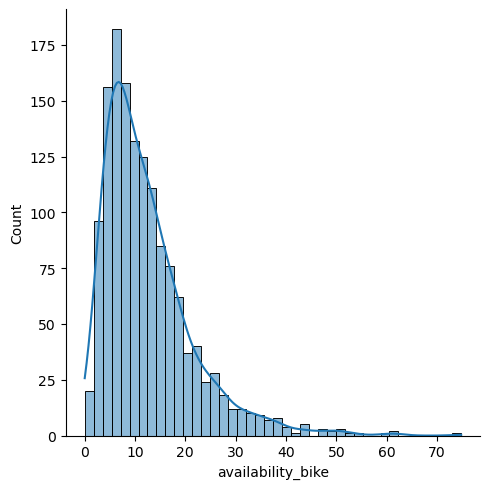

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


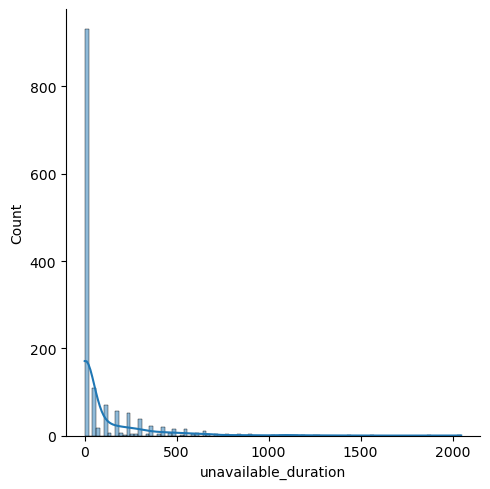

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


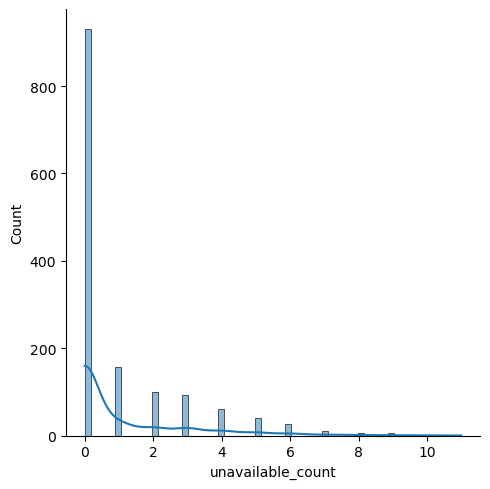

In [49]:
def plot_num(Dataframe):
    for column in Dataframe.columns:
        sns.displot(x=Dataframe[column],kde=True)
        plt.show()
    return None
   

plot_num(numerical)

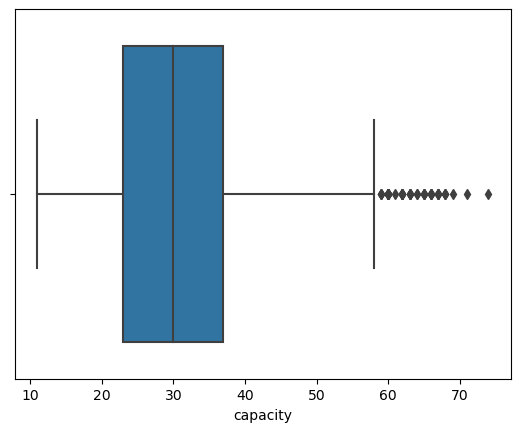

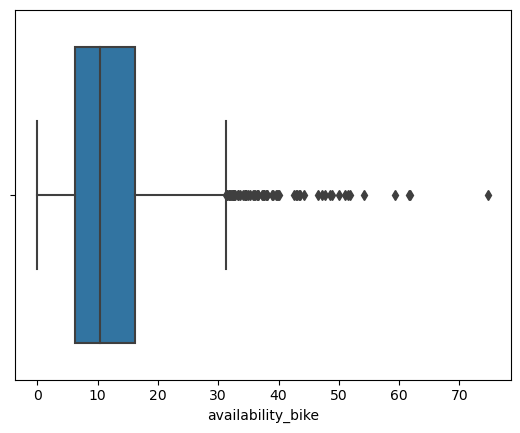

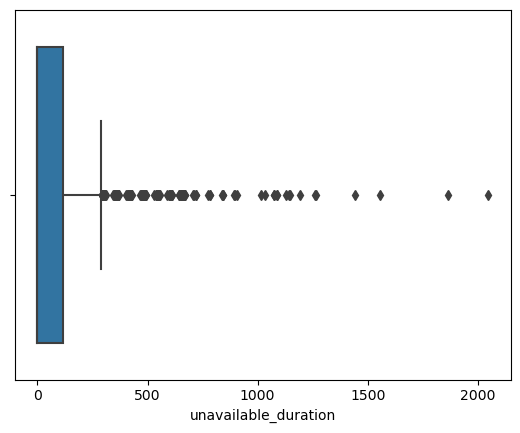

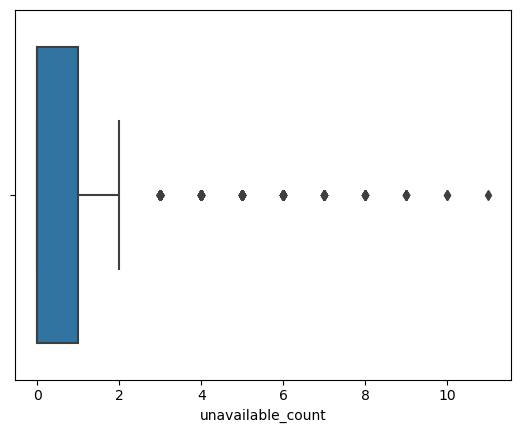

In [50]:
for column in numerical.columns:
        sns.boxplot(x=numerical[column])
        plt.show()

 #not too many outliers  

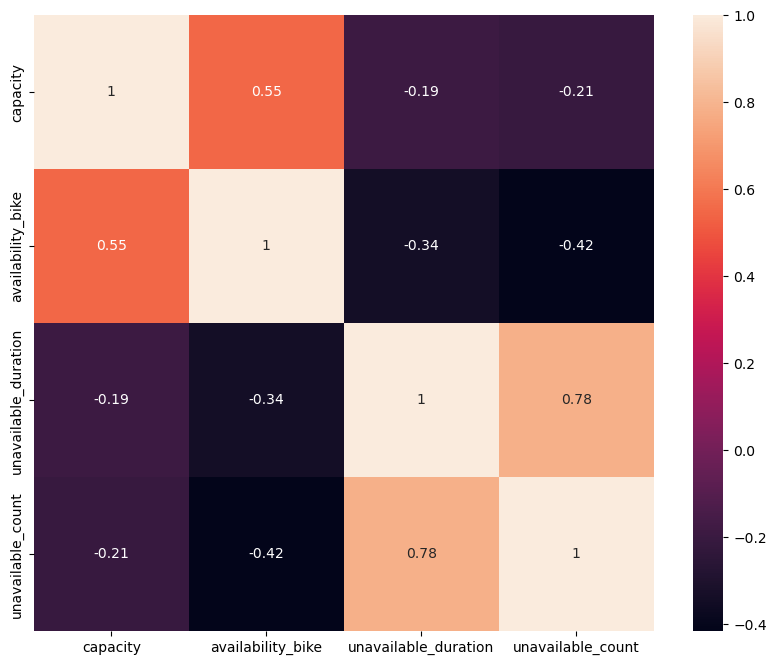

,capacity,availability_bike,unavailable_duration,unavailable_count
capacity,1.000000,0.551503,-0.194495,-0.207923
availability_bike,0.551503,1.000000,-0.340867,-0.415879
unavailable_duration,-0.194495,-0.340867,1.000000,0.780939
unavailable_count,-0.207923,-0.415879,0.780939,1.000000


In [51]:
corr_matrix=numerical.corr() 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

corr_matrix

In [52]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity,1432.0,31.525140,11.575206,11.0,23.000000,30.000000,37.000000,74.000000
availability_bike,1432.0,12.474619,8.966498,0.0,6.174597,10.350714,16.228485,74.805907
unavailable_duration,1432.0,96.476257,204.825503,0.0,0.000000,0.000000,117.000000,2047.000000
unavailable_count,1432.0,1.006983,1.784303,0.0,0.000000,0.000000,1.000000,11.000000


In [53]:
def value_count(df):
    for columns in df:
            print (len(numerical[columns].value_counts()),':  ',columns)
    return

value_count(numerical)
        

61 :   capacity
1423 :   availability_bike
200 :   unavailable_duration
12 :   unavailable_count


In [54]:
def outliers(column, threshold = 3):
   
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    
    return data

In [55]:
duration_outliers = outliers(numerical["unavailable_duration"])
len(duration_outliers)

27

In [56]:
count_outliers = outliers(numerical["unavailable_count"])
len(count_outliers)

26

In [57]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)
   
        

In [58]:
discrete_lst, continuous_lst = discrete_continuous(numerical)

In [59]:
print('Discrete List:  ',discrete_lst)
print('Continuous List:   ',continuous_lst)

Discrete List:   ['unavailable_count']
Continuous List:    ['capacity', 'availability_bike', 'unavailable_duration']


In [60]:
num_discrete_df = numerical[['unavailable_count','capacity']]
num_continuous_df = numerical[['availability_bike', 'unavailable_duration']]

# Cleaning Categorical Data

In [61]:
categorical=data.select_dtypes(include=object)

In [62]:
categorical.nunique()

nom            1430
coordinates    1432
communes         81
dtype: int64

In [63]:
categorical = categorical.drop(['nom','coordinates'],axis=1)

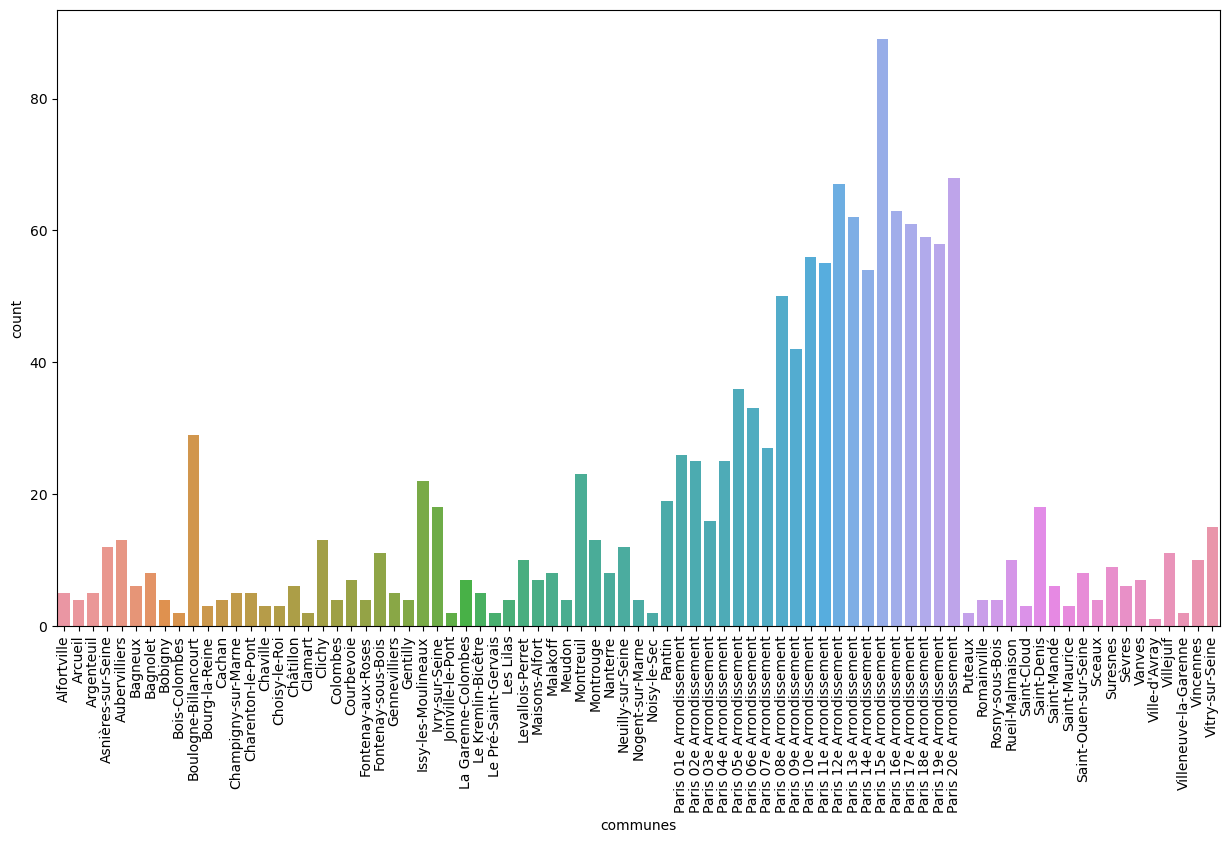

In [64]:
ordered_categories = categorical['communes'].sort_values().unique()
plt.figure(figsize=(15, 8))
sns.countplot(x=categorical['communes'], order=ordered_categories)
plt.xticks(rotation=90) 
plt.show()

In [65]:
data = pd.concat([numerical, categorical], axis=1)
data

,capacity,availability_bike,unavailable_duration,unavailable_count,communes
0,62,11.869707,0.0,0,Paris 10e Arrondissement
1,17,7.632075,119.0,2,Paris 10e Arrondissement
2,48,17.184211,0.0,0,Paris 10e Arrondissement
3,17,7.911932,0.0,0,Paris 10e Arrondissement
4,28,13.638776,0.0,0,Paris 10e Arrondissement
...,...,...,...,...,...
1427,20,16.389831,0.0,0,Nanterre
1428,43,21.022901,0.0,0,Nanterre
1429,30,5.030612,121.0,1,Nanterre
1430,22,6.164179,123.0,2,Nanterre


In [175]:
X = data.drop('unavailable_duration',axis=1)
y = data['unavailable_duration']

In [176]:
test_size = 0.2

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [178]:
X_train_cat = X_train.select_dtypes(include='object')
X_train_num = X_train.select_dtypes(include=np.number)
X_test_cat = X_test.select_dtypes(include='object')
X_test_num = X_test.select_dtypes(include=np.number)

In [179]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)


In [180]:
onehot = OneHotEncoder(handle_unknown='ignore', drop='first')
onehot.fit(X_train_cat)

encoded_train = onehot.transform(X_train_cat)
encoded_test = onehot.transform(X_test_cat)

X_train_cat_encoded = pd.DataFrame(encoded_train.toarray())
X_test_cat_encoded = pd.DataFrame(encoded_test.toarray())

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [181]:
X_train = pd.concat((X_train_cat_encoded, X_train_num_scaled),axis=1)
X_test = pd.concat((X_test_cat_encoded, X_test_num_scaled),axis=1)

In [182]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [183]:
models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor(),
          DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

In [184]:
def train_and_test(models, X_train, y_train, X_test, y_test):
    results = {}
    
    for model in models:
        model.fit(X_train, y_train)
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        n_train, p_train = X_train.shape
        adj_train_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        n_test, p_test = X_test.shape
        adj_test_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)
        
        results[type(model).__name__] = {
            'Train R-squared': train_r2,
            'Test R-squared': test_r2,
            
            'Train Adjusted R-squared': adj_train_r2,
            'Test Adjusted R-squared': adj_test_r2,
    
            'Train MAE': train_mae,
            'Test MAE': test_mae,
            
            'Train MSE': train_mse,
            'Test MSE': test_mse,
            
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
        }
    
    return results

models = [LinearRegression(), KNeighborsRegressor(),MLPRegressor(),
    DecisionTreeRegressor(), RandomForestRegressor(),GradientBoostingRegressor()]
results = train_and_test(models, X_train, y_train, X_test, y_test)

for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()


/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


LinearRegression:
Train R-squared: 0.6709
Test R-squared: 0.4546
Train Adjusted R-squared: 0.6455
Test Adjusted R-squared: 0.2354
Train MAE: 50.7326
Test MAE: 52.1091
Train MSE: 14013.9920
Test MSE: 21390.7721
Train RMSE: 118.3807
Test RMSE: 146.2558

KNeighborsRegressor:
Train R-squared: 0.6326
Test R-squared: 0.3426
Train Adjusted R-squared: 0.6042
Test Adjusted R-squared: 0.0783
Train MAE: 48.3981
Test MAE: 55.3387
Train MSE: 15645.3838
Test MSE: 25783.6174
Train RMSE: 125.0815
Test RMSE: 160.5728

MLPRegressor:
Train R-squared: 0.3479
Test R-squared: 0.2343
Train Adjusted R-squared: 0.2975
Test Adjusted R-squared: -0.0735
Train MAE: 88.0421
Test MAE: 87.9115
Train MSE: 27766.9722
Test MSE: 30031.0939
Train RMSE: 166.6342
Test RMSE: 173.2948

DecisionTreeRegressor:
Train R-squared: 1.0000
Test R-squared: 0.1051
Train Adjusted R-squared: 1.0000
Test Adjusted R-squared: -0.2546
Train MAE: 0.0000
Test MAE: 48.6516
Train MSE: 0.0000
Test MSE: 35098.5331
Train RMSE: 0.0000
Test RMSE: 187

In determining the most suitable model, three key metrics are considered:

- R-squared (R²): Evaluates the explanatory power of the model by measuring the proportion of variance in the dependent variable accounted for by the independent variables.

- Adjusted R-squared (Adjusted R²): Refines R-squared by considering model complexity, penalizing the inclusion of unnecessary predictors, thus offering a more accurate assessment, particularly during model comparisons.

- Mean Absolute Error (MAE): Quantifies prediction accuracy by measuring the average magnitude of errors between predicted and actual values, providing robustness against outliers. In scenarios where predicting unavailable duration is critical, regardless of direction, minimizing MAE is imperative.

Considering R-squared, Adjusted R-squared, and MAE:

1. Linear Regression demonstrates consistent R-squared and Adjusted R-squared values across both training and testing datasets, accompanied by a lower MAE on the test set.

2. Random Forest Regressor exhibits strong performance, characterized by relatively high R-squared and Adjusted R-squared scores on both training and testing sets, coupled with a lower MAE compared to Linear Regression.

3. Gradient Boosting Regressor also showcases robust performance, featuring elevated R-squared and Adjusted R-squared metrics across both training and testing datasets, alongside a moderate MAE on the test set.

In [185]:
metrics_df = pd.DataFrame.from_dict(fitted_results, orient='index')
metrics_df = metrics_df.drop(['KNeighborsRegressor','MLPRegressor','DecisionTreeRegressor'])
metrics_df

,Train R-squared,Test R-squared,Train Adjusted R-squared,Test Adjusted R-squared,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE
LinearRegression,0.630507,0.664389,0.605036,0.200126,51.768720,49.426761,15472.658824,14213.812445,124.389143,119.221695
RandomForestRegressor,0.931918,0.596482,0.927225,0.038283,16.725085,39.738333,2850.959494,17089.781819,53.394377,130.727892
GradientBoostingRegressor,0.849613,0.647455,0.839246,0.159767,31.957792,44.104587,6297.531256,14930.999300,79.356986,122.192468


## Hypothesis Testing

In [195]:
data

,capacity,availability_bike,unavailable_duration,unavailable_count,communes
0,62,11.869707,0.0,0,Paris 10e Arrondissement
1,17,7.632075,119.0,2,Paris 10e Arrondissement
2,48,17.184211,0.0,0,Paris 10e Arrondissement
3,17,7.911932,0.0,0,Paris 10e Arrondissement
4,28,13.638776,0.0,0,Paris 10e Arrondissement
...,...,...,...,...,...
1427,20,16.389831,0.0,0,Nanterre
1428,43,21.022901,0.0,0,Nanterre
1429,30,5.030612,121.0,1,Nanterre
1430,22,6.164179,123.0,2,Nanterre


In [215]:
#H0: There is no significant relationship between the given factors and the availability of Velib bikes at rental stations in Paris.



data_num = data.drop('communes',axis=1)
corr_matrix = data_num.corr()
unavailability_correlations = corr_matrix['unavailable_duration']
alpha = 0.05

for feature, correlation in unavailability_correlations.items():
    if feature != 'unavailable_duration':
        if abs(correlation) < alpha:
            print(f"Fail to reject H0: There is no significant relationship between the {feature} and unavailable duration.")
        else:
            print(f"Reject H0: There is a significant relationship between the {feature} and unavailable duration.")


Reject H0: There is a significant relationship between the capacity and unavailable duration.
Reject H0: There is a significant relationship between the availability_bike and unavailable duration.
Reject H0: There is a significant relationship between the unavailable_count and unavailable duration.


In [216]:
from scipy.stats import f_oneway

commune_groups = [data[data['communes'] == commune]['unavailable_duration'] for commune in set(data['communes'])]
statistic, p_value = f_oneway(*commune_groups)
alpha = 0.05

if p_value < alpha:
    print("Reject H0. There is a significant relationship between communes and unavailable duration.")
else:
    print("Fail to reject H0. There is no significant relationship between communes and unavailable duration.")


Reject H0. There is a significant relationship between communes and unavailable duration.


## Check for imbalance

In [193]:
def train_and_test_combined(models, X_train, y_train, X_test, y_test):
    results = {}
    
    # Combine the training and testing data
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.concatenate((y_train, y_test))
    
    for model in models:
        model.fit(X_combined, y_combined)
        predictions_combined = model.predict(X_combined)

        mae_combined = mean_absolute_error(y_combined, predictions_combined)
        mse_combined = mean_squared_error(y_combined, predictions_combined)
        rmse_combined = np.sqrt(mse_combined)
        r2_combined = r2_score(y_combined, predictions_combined)
        n_combined, p_combined = X_combined.shape
        adj_r2_combined = 1 - (1 - r2_combined) * (n_combined - 1) / (n_combined - p_combined - 1)
        
        results[type(model).__name__] = {
            'Combined R-squared': r2_combined,
            'Combined Adjusted R-squared': adj_r2_combined,
            'Combined MAE': mae_combined,
            'Combined MSE': mse_combined,
            'Combined RMSE': rmse_combined,
        }
    
    return results
fitted_models = [LinearRegression(), RandomForestRegressor(),GradientBoostingRegressor()]
fitted_results = train_and_test_combined(fitted_models, X_train, y_train, X_test, y_test)
metrics_df = pd.DataFrame.from_dict(fitted_results, orient='index')
metrics_df

,Combined R-squared,Combined Adjusted R-squared,Combined MAE,Combined MSE,Combined RMSE
LinearRegression,0.635001,0.612814,51.441748,15302.278380,123.702378
RandomForestRegressor,0.932996,0.928923,16.956802,2809.097021,53.000915
GradientBoostingRegressor,0.824338,0.813660,33.249605,7364.484483,85.816575


In [194]:
metrics_df = pd.DataFrame.from_dict(fitted_results, orient='index')
mean_squared_error_values = metrics_df['Combined MSE'].values

max_mse = max(mean_squared_error_values)
min_mse = min(mean_squared_error_values)

if max_mse / min_mse > 1.5:
    print("Undersampling may be present in the dataset.")
else:
    print("Undersampling is not present in the dataset.")


Undersampling may be present in the dataset.


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   capacity              1432 non-null   int64  
 1   availability_bike     1432 non-null   float64
 2   unavailable_duration  1432 non-null   float64
 3   unavailable_count     1432 non-null   int64  
 4   communes              1432 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 56.1+ KB


In [31]:
#data[data['capacity']==data['capacity'].max()]

In [32]:
#data[data['availability_bike']==data['availability_bike'].max()]

In [33]:
#dfff = pd.read_csv('velibs_export_2024-02-13_10:44.csv')


In [34]:
#dfff[dfff['identifiant_station']=='12127']

In [35]:
#overcapacity_stations = dfff[dfff['nombre_total_vélos_disponibles']>dfff['capacité_de_la_station']]['nom_station'].unique()
#display(len(overcapacity_stations))
#list(overcapacity_stations)

In [36]:
#normal due to overcapacitated stations 
#source : https://parissecret.com/un-nouveau-type-de-station-velib-vous-permet-de-deposer-votre-velo-meme-sans-place-disponible/
#https://blog.velib-metropole.fr/test-station-plus/
#Lavandieres Sainte Opportune - Rivoli (Station n°1120)
#Abbé Groult - Convention (Station n°15039)


#Aristide Briand – Place de la Résistance (92130 Issy-Les-Moulineaux)
#Malesherbes – Place de la Madeleine (75008 Paris)
#Madeleine Vionnet (93300 Aubervilliers)
#Caumartin – Provence (75009 Paris)
#Bibliothèque Nationale de France (75013 Paris)
#Place du Moulin de Javel (75015 Paris)
#Place Balard (75015 Paris)
#Westermeyer – Paul Vaillant-Couturier (94200 Ivry-sur-Seine)

#Tremblay - Lac des Minimes - Station n°12127
#Saint-Denis - Rivoli - Station n°1003

#Sebastopol – Rambuteau (75004 Paris)
#Saint-Antoine – Sévigné (75004 Paris)
#Place Charles Vallin (75015 Paris)
#Carrefour Pleyel (93200 Saint-Denis)
#Bercy – Villot (75012 Paris)

#Quai des Célestins – Henri IV (75004 Paris)
#Gare Saint-Lazare – Cour du Havre (75008 Paris)
#Place de l’Hôtel de Ville (75004 Paris)
#Daumesnil – Picpus (75012 Paris)
#Clichy – Place Blanche (75018 Paris)
#Cité de la Musique (75019 Paris)
#Enfants du Paradis – Peupliers (92100 Boulogne Billancourt)

#Général de Gaulle • Alouette (94160 Saint Mandé – fonctionnalité prochainement disponible)


In [37]:
#dfff[(dfff['identifiant_station'].isin(['1120', '15039']))&(dfff['nombre_total_vélos_disponibles']>dfff['capacité_de_la_station'])]

In [60]:
#dfff[dfff['identifiant_station'].isin(['1120', '15039'])].groupby(['identifiant_station','capacité_de_la_station'])['nombre_total_vélos_disponibles'].agg(np.mean)

In [61]:
#data[data['availability_bike']>data['capacity']]